In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("Class1.txt",delimiter=' ', header=None)
df2 = pd.read_csv("Class2.txt",delimiter=' ', header=None)
df3 = pd.read_csv("Class3.txt",delimiter=' ', header=None)

In [3]:
df1 = df1.sample(frac=1, random_state=42).reset_index(drop=True)
df2 = df2.sample(frac=1, random_state=42).reset_index(drop=True)
df3 = df3.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
df1_train = df1[:int(len(df1)*0.7)]
df1_test = df1[int(len(df1)*0.7):]
df2_train = df2[:int(len(df2)*0.7)]
df2_test = df2[int(len(df2)*0.7):]
df3_train = df3[:int(len(df3)*0.7)]
df3_test = df3[int(len(df3)*0.7):]
print(len(df1_train))
print(len(df1_test))

350
150


## MEAN

In [5]:
def means(df):
    means = {}
    for col in df.columns:
        means[col] = sum(df[col]) / len(df[col])
    return means

In [6]:
means1 = means(df1_train)
means2 = means(df2_train)
means3 = means(df3_train)

In [7]:
print(means1)
print(means2)
print(means3)

{0: 15.024189428571418, 1: -6.068253714285708}
{0: 11.978058857142855, 1: 6.940941857142856}
{0: -0.9279507725714292, 1: -5.25126938971429}


## CENTERED DATA

In [8]:
def centered_data(df, means):
    centered_data = {}
    for col in df.columns:
        centered_data[col] = [value - means[col] for value in df[col]]
    return centered_data

In [9]:
centered_data1 = centered_data(df1_train, means1)
centered_data2 = centered_data(df2_train, means2)
centered_data3 = centered_data(df3_train, means3)

## COVARIANCE MATRIX

In [10]:
def covariance_matrix(df,centered_data):
  n = len(df)
  cov_matrix= {}
  for col1 in df.columns:
    cov_matrix[col1] = {}
    for col2 in df.columns:
        cov = sum(centered_data[col1][i] * centered_data[col2][i] for i in range(n)) / (n - 1)
        cov_matrix[col1][col2] = cov
  cov_matrix_df = pd.DataFrame(cov_matrix)
  return cov_matrix_df

In [11]:
cov_matrix_1 = covariance_matrix(df1_train,centered_data1)
cov_matrix_2 = covariance_matrix(df2_train,centered_data2)
cov_matrix_3 = covariance_matrix(df3_train,centered_data3)
print(cov_matrix_1)
print(cov_matrix_2)
print(cov_matrix_3)
cov_matrix_all=(cov_matrix_3+cov_matrix_2+cov_matrix_1)/3
print(cov_matrix_all)

          0         1
0  8.623079 -3.023923
1 -3.023923  2.709625
          0         1
0  3.041562  2.765569
1  2.765569  4.790531
          0         1
0  2.050821 -1.727412
1 -1.727412  9.142962
          0         1
0  4.571821 -0.661922
1 -0.661922  5.547706


In [ ]:
def covariance_matrix_d(df,centered_data):  #diagonal covariance matrix
  n = len(df)
  cov_matrix= {}
  for col1 in df.columns:
    cov_matrix[col1] = {}
    for col2 in df.columns:
        if col1 == col2:
          cov = sum(centered_data[col1][i] * centered_data[col2][i] for i in range(n)) / (n - 1)
          cov_matrix[col1][col2] = cov
        else:
          cov_matrix[col1][col2] = 0
  cov_matrix_df = pd.DataFrame(cov_matrix)
  return cov_matrix_df

In [ ]:
cov_matrix_1_d = covariance_matrix_d(df1_train,centered_data1)
cov_matrix_2_d = covariance_matrix_d(df2_train,centered_data2)
cov_matrix_3_d = covariance_matrix_d(df3_train,centered_data3)
print(cov_matrix_1_d)
print(cov_matrix_2_d)
print(cov_matrix_3_d)
cov_matrix_all_d=(cov_matrix_3_d+cov_matrix_2_d+cov_matrix_1_d)/3
print(cov_matrix_all_d)

          0         1
0  8.623079  0.000000
1  0.000000  2.709625
          0         1
0  3.041562  0.000000
1  0.000000  4.790531
          0         1
0  2.050821  0.000000
1  0.000000  9.142962
          0         1
0  4.571821  0.000000
1  0.000000  5.547706


##PRIOR

In [ ]:
priors={'class1':0.33, 'class2':0.33, 'class3':0.33}

## LIKELIHOOD

In [ ]:
def calculate_likelihood(x, means, cov_matrix):
    x = np.array(x)
    mu = np.array([means[col] for col in means.keys()])
    sigma_inv = np.linalg.inv(cov_matrix)
    sigma_det = np.linalg.det(cov_matrix)
    d = len(x)  # Number of dimensions

    # Compute the term (x - mu).T * Sigma_inv * (x - mu)
    diff = x - mu
    exponent = -0.5 * np.dot(np.dot(diff.T, sigma_inv), diff)

    # Compute the coefficient (1 / sqrt((2 * pi)^d * |Sigma|))
    coefficient = 1 / np.sqrt((2 * np.pi) ** d * sigma_det)

    # Compute the likelihood
    likelihood = coefficient * np.exp(exponent)
    return likelihood

## EVIDENCE

In [ ]:
class_stats = { #covariance matrix is full and different
    'class1': (means1, cov_matrix_1),
    'class2': (means2, cov_matrix_2),
    'class3': (means3, cov_matrix_3)
}

In [ ]:
class_stats_d = {  #covariance matrix is diagonal and different
    'class1': (means1, cov_matrix_1_d),
    'class2': (means2, cov_matrix_2_d),
    'class3': (means3, cov_matrix_3_d)
}

In [ ]:
class_stats_all = {   #covariance matrix is full but same
    'class1': (means1, cov_matrix_all),
    'class2': (means2, cov_matrix_all),
    'class3': (means3, cov_matrix_all)
}

In [ ]:
class_stats_all_d = {   #covariance matrix is diagonal but same
    'class1': (means1, cov_matrix_all_d),
    'class2': (means2, cov_matrix_all_d),
    'class3': (means3, cov_matrix_all_d)
}

In [ ]:
def calculate_evidence(x_test, class_stats, priors):
    evidence = 0
    for cls in class_stats:
        means, cov_matrix = class_stats[cls]
        likelihood = calculate_likelihood(x_test, means, cov_matrix)
        evidence += likelihood * priors[cls]
    return evidence

## POSTERIOR

In [ ]:
def calculate_posterior(x_test, class_stats, priors):
    posteriors = {}
    evidence = calculate_evidence(x_test, class_stats, priors)
    for cls in class_stats:
        means, cov_matrix = class_stats[cls]
        likelihood = calculate_likelihood(x_test, means, cov_matrix)
        posterior = (likelihood * priors[cls]) / evidence
        posteriors[cls] = posterior
    return posteriors

## CALCULATING FOR ALL THE POINTS

In [ ]:
df_test_all = pd.concat([df1_test, df2_test, df3_test], ignore_index=True)
df_test_all['class'] = ''
df_test_all.iloc[:150, df_test_all.columns.get_loc('class')] = 'class1'
df_test_all.iloc[150:300, df_test_all.columns.get_loc('class')] = 'class2'
df_test_all.iloc[300:450, df_test_all.columns.get_loc('class')] = 'class3'
df_test_all

,0,1,class
0,16.64600,-7.4930,class1
1,17.94300,-7.2423,class1
2,11.48100,-6.5141,class1
3,14.41700,-6.5709,class1
4,13.78600,-5.9581,class1
...,...,...,...
445,-1.38220,-3.5140,class3
446,-1.55360,-6.1031,class3
447,0.98214,-6.2626,class3
448,0.43664,-4.2389,class3


Covariance matrix is full and different

In [ ]:
posterior_results = []
for index, row in df_test_all.drop("class", axis=1).iterrows():
    x_test = row.values  # Convert the row to a numpy array
    posteriors = calculate_posterior(x_test, class_stats, priors)
    posterior_results.append(posteriors)

posterior_df = pd.DataFrame(posterior_results)
posterior_df['predicted_class'] = posterior_df.idxmax(axis=1)
print(posterior_df)

           class1        class2        class3 predicted_class
0    1.000000e+00  2.995403e-35  9.607484e-38          class1
1    1.000000e+00  1.427658e-39  1.067576e-43          class1
2    1.000000e+00  4.989282e-16  9.547374e-19          class1
3    1.000000e+00  1.592586e-24  2.079849e-29          class1
4    1.000000e+00  6.255615e-21  1.772441e-27          class1
..            ...           ...           ...             ...
445  9.338964e-09  1.719850e-13  1.000000e+00          class3
446  4.937567e-12  1.409524e-13  1.000000e+00          class3
447  1.008603e-08  9.175810e-10  1.000000e+00          class3
448  3.724080e-07  8.977235e-10  9.999996e-01          class3
449  1.239243e-10  8.452239e-14  1.000000e+00          class3

[450 rows x 4 columns]


Covariance matrix is diagonal and different

In [ ]:
posterior_results = []
for index, row in df_test_all.drop("class", axis=1).iterrows():
    x_test = row.values  # Convert the row to a numpy array
    posteriors = calculate_posterior(x_test, class_stats_d, priors)
    posterior_results.append(posteriors)

posterior_df_d = pd.DataFrame(posterior_results)
posterior_df_d['predicted_class'] = posterior_df_d.idxmax(axis=1)
print(posterior_df_d)

           class1        class2        class3 predicted_class
0    1.000000e+00  2.148596e-11  2.857644e-33          class1
1    1.000000e+00  5.873150e-12  3.735161e-38          class1
2    1.000000e+00  1.624813e-08  1.091136e-16          class1
3    1.000000e+00  2.702677e-09  1.270354e-25          class1
4    1.000000e+00  2.326926e-08  1.418300e-23          class1
..            ...           ...           ...             ...
445  5.554551e-08  2.819519e-18  9.999999e-01          class3
446  1.230783e-07  2.130189e-21  9.999999e-01          class3
447  2.479700e-05  8.529212e-17  9.999752e-01          class3
448  3.522681e-06  1.261312e-15  9.999965e-01          class3
449  7.957185e-08  2.480447e-20  9.999999e-01          class3

[450 rows x 4 columns]


Covariance matrix is full but same

In [ ]:
posterior_results = []
for index, row in df_test_all.drop("class", axis=1).iterrows():
    x_test = row.values  # Convert the row to a numpy array
    posteriors = calculate_posterior(x_test, class_stats_all, priors)
    posterior_results.append(posteriors)

posterior_df_all = pd.DataFrame(posterior_results)
posterior_df_all['predicted_class'] = posterior_df_all.idxmax(axis=1)
print(posterior_df_all)

           class1        class2        class3 predicted_class
0    1.000000e+00  4.047383e-09  3.225239e-15          class1
1    1.000000e+00  4.686725e-09  3.097501e-17          class1
2    9.999996e-01  2.153295e-07  2.031829e-07          class1
3    9.999999e-01  7.116216e-08  6.531588e-12          class1
4    9.999996e-01  3.604896e-07  5.119256e-11          class1
..            ...           ...           ...             ...
445  2.163164e-13  3.383748e-15  1.000000e+00          class3
446  5.815133e-14  2.463053e-18  1.000000e+00          class3
447  4.283423e-10  5.405441e-15  1.000000e+00          class3
448  1.087415e-10  1.746997e-13  1.000000e+00          class3
449  5.347299e-14  3.205625e-17  1.000000e+00          class3

[450 rows x 4 columns]


Covariance matrix is diagonal and same

In [ ]:
posterior_results = []
for index, row in df_test_all.drop("class", axis=1).iterrows():
    x_test = row.values  # Convert the row to a numpy array
    posteriors = calculate_posterior(x_test, class_stats_all_d, priors)
    posterior_results.append(posteriors)

posterior_df_all_d = pd.DataFrame(posterior_results)
posterior_df_all_d['predicted_class'] = posterior_df_all_d.idxmax(axis=1)
print(posterior_df_all_d)

           class1        class2        class3 predicted_class
0    1.000000e+00  1.034402e-09  2.180552e-15          class1
1    1.000000e+00  7.846928e-10  2.450114e-17          class1
2    9.999995e-01  3.207523e-07  1.690348e-07          class1
3    1.000000e+00  3.969662e-08  5.960251e-12          class1
4    9.999997e-01  2.543440e-07  5.897193e-11          class1
..            ...           ...           ...             ...
445  1.224185e-13  2.352227e-13  1.000000e+00          class3
446  9.856104e-14  4.899785e-16  1.000000e+00          class3
447  7.021823e-10  4.433383e-13  1.000000e+00          class3
448  7.769545e-11  8.118555e-12  1.000000e+00          class3
449  5.648745e-14  4.315269e-15  1.000000e+00          class3

[450 rows x 4 columns]


## CONFUSION MATRIX

Covariance matrix is full and different

In [ ]:
y_true = df_test_all['class'].values
y_pred = posterior_df['predicted_class'].values

classes = ['class1', 'class2', 'class3']
conf_matrix = {cls: {cls_: 0 for cls_ in classes} for cls in classes}

for actual, predicted in zip(y_true, y_pred):
    conf_matrix[actual][predicted] += 1

conf_matrix_df = pd.DataFrame(conf_matrix)
print("Confusion Matrix:")
print(conf_matrix_df)


Confusion Matrix:
        class1  class2  class3
class1     150       0       0
class2       0     150       0
class3       0       0     150


Covariance matrix is diagonal and different

In [ ]:
y_true = df_test_all['class'].values
y_pred = posterior_df_d['predicted_class'].values

classes = ['class1', 'class2', 'class3']
conf_matrix_d = {cls: {cls_: 0 for cls_ in classes} for cls in classes}

for actual, predicted in zip(y_true, y_pred):
    conf_matrix_d[actual][predicted] += 1

conf_matrix_df = pd.DataFrame(conf_matrix_d)
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        class1  class2  class3
class1     150       0       0
class2       0     150       0
class3       0       0     150


Covariance matrix is full but same

In [ ]:
y_true = df_test_all['class'].values
y_pred = posterior_df_all['predicted_class'].values

classes = ['class1', 'class2', 'class3']
conf_matrix_all = {cls: {cls_: 0 for cls_ in classes} for cls in classes}

for actual, predicted in zip(y_true, y_pred):
    conf_matrix_all[actual][predicted] += 1

conf_matrix_df = pd.DataFrame(conf_matrix_all)
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        class1  class2  class3
class1     150       0       0
class2       0     150       0
class3       0       0     150


Covariance matrix is diagonal and same

In [ ]:
y_true = df_test_all['class'].values
y_pred = posterior_df_all_d['predicted_class'].values

classes = ['class1', 'class2', 'class3']
conf_matrix_all_d = {cls: {cls_: 0 for cls_ in classes} for cls in classes}

for actual, predicted in zip(y_true, y_pred):
    conf_matrix_all_d[actual][predicted] += 1

conf_matrix_df = pd.DataFrame(conf_matrix_all_d)
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        class1  class2  class3
class1     150       0       0
class2       0     150       0
class3       0       0     150


## ACCURACY

Covariance matrix is full and different

In [ ]:
total_correct = sum(conf_matrix[cls][cls] for cls in classes)
total_samples = len(y_true)
accuracy = total_correct / total_samples
print("\nAccuracy:", accuracy)


Accuracy: 1.0


Covariance matrix is diagonal and different

In [ ]:
total_correct = sum(conf_matrix_d[cls][cls] for cls in classes)
total_samples = len(y_true)
accuracy = total_correct / total_samples
print("\nAccuracy:", accuracy)


Accuracy: 1.0


Covariance matrix is full but same

In [ ]:
total_correct = sum(conf_matrix_all[cls][cls] for cls in classes)
total_samples = len(y_true)
accuracy = total_correct / total_samples
print("\nAccuracy:", accuracy)


Accuracy: 1.0


Covariance matrix is diagonal and same

In [ ]:
total_correct = sum(conf_matrix_all_d[cls][cls] for cls in classes)
total_samples = len(y_true)
accuracy = total_correct / total_samples
print("\nAccuracy:", accuracy)


Accuracy: 1.0


## PRECISION, RECALL AND F1-SCORE

Covariance matrix is full and different

In [ ]:
precision = {}
recall = {}
f1_score = {}

for cls in classes:
    tp = conf_matrix[cls][cls]  # True Positives
    fp = sum(conf_matrix[other_cls][cls] for other_cls in classes if other_cls != cls)  # False Positives
    fn = sum(conf_matrix[cls][other_cls] for other_cls in classes if other_cls != cls)  # False Negatives

    # Precision: TP / (TP + FP)
    precision[cls] = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Recall: TP / (TP + FN)
    recall[cls] = tp / (tp + fn) if (tp + fn) > 0 else 0

    # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
    if (precision[cls] + recall[cls]) > 0:
        f1_score[cls] = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls])
    else:
        f1_score[cls] = 0

precision_df = pd.DataFrame(list(precision.items()), columns=['Class', 'Precision'])
recall_df = pd.DataFrame(list(recall.items()), columns=['Class', 'Recall'])
f1_score_df = pd.DataFrame(list(f1_score.items()), columns=['Class', 'F1-Score'])

print("\nPrecision for each class:")
print(precision_df)

print("\nRecall for each class:")
print(recall_df)

print("\nF1-Score for each class:")
print(f1_score_df)



Precision for each class:
    Class  Precision
0  class1        1.0
1  class2        1.0
2  class3        1.0

Recall for each class:
    Class  Recall
0  class1     1.0
1  class2     1.0
2  class3     1.0

F1-Score for each class:
    Class  F1-Score
0  class1       1.0
1  class2       1.0
2  class3       1.0


In [ ]:
mean_precision = sum(precision.values()) / len(precision)
print("\nMean Precision:", mean_precision)
mean_recall = sum(recall.values()) / len(recall)
print("\nMean Recall:", mean_recall)
mean_f1_score = sum(f1_score.values()) / len(f1_score)
print("\nMean F1-Score:", mean_f1_score)


Mean Precision: 1.0

Mean Recall: 1.0

Mean F1-Score: 1.0


Covariance matrix is diagonal and different

In [ ]:
precision = {}
recall = {}
f1_score = {}

for cls in classes:
    tp = conf_matrix_d[cls][cls]  # True Positives
    fp = sum(conf_matrix_d[other_cls][cls] for other_cls in classes if other_cls != cls)  # False Positives
    fn = sum(conf_matrix_d[cls][other_cls] for other_cls in classes if other_cls != cls)  # False Negatives

    # Precision: TP / (TP + FP)
    precision[cls] = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Recall: TP / (TP + FN)
    recall[cls] = tp / (tp + fn) if (tp + fn) > 0 else 0

    # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
    if (precision[cls] + recall[cls]) > 0:
        f1_score[cls] = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls])
    else:
        f1_score[cls] = 0

precision_df = pd.DataFrame(list(precision.items()), columns=['Class', 'Precision'])
recall_df = pd.DataFrame(list(recall.items()), columns=['Class', 'Recall'])
f1_score_df = pd.DataFrame(list(f1_score.items()), columns=['Class', 'F1-Score'])

print("\nPrecision for each class:")
print(precision_df)

print("\nRecall for each class:")
print(recall_df)

print("\nF1-Score for each class:")
print(f1_score_df)



Precision for each class:
    Class  Precision
0  class1        1.0
1  class2        1.0
2  class3        1.0

Recall for each class:
    Class  Recall
0  class1     1.0
1  class2     1.0
2  class3     1.0

F1-Score for each class:
    Class  F1-Score
0  class1       1.0
1  class2       1.0
2  class3       1.0


In [ ]:
mean_precision = sum(precision.values()) / len(precision)
print("\nMean Precision:", mean_precision)
mean_recall = sum(recall.values()) / len(recall)
print("\nMean Recall:", mean_recall)
mean_f1_score = sum(f1_score.values()) / len(f1_score)
print("\nMean F1-Score:", mean_f1_score)


Mean Precision: 1.0

Mean Recall: 1.0

Mean F1-Score: 1.0


Covariance matrix is full but same

In [ ]:
precision = {}
recall = {}
f1_score = {}

for cls in classes:
    tp = conf_matrix_all[cls][cls]  # True Positives
    fp = sum(conf_matrix_all[other_cls][cls] for other_cls in classes if other_cls != cls)  # False Positives
    fn = sum(conf_matrix_all[cls][other_cls] for other_cls in classes if other_cls != cls)  # False Negatives

    # Precision: TP / (TP + FP)
    precision[cls] = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Recall: TP / (TP + FN)
    recall[cls] = tp / (tp + fn) if (tp + fn) > 0 else 0

    # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
    if (precision[cls] + recall[cls]) > 0:
        f1_score[cls] = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls])
    else:
        f1_score[cls] = 0

precision_df = pd.DataFrame(list(precision.items()), columns=['Class', 'Precision'])
recall_df = pd.DataFrame(list(recall.items()), columns=['Class', 'Recall'])
f1_score_df = pd.DataFrame(list(f1_score.items()), columns=['Class', 'F1-Score'])

print("\nPrecision for each class:")
print(precision_df)

print("\nRecall for each class:")
print(recall_df)

print("\nF1-Score for each class:")
print(f1_score_df)



Precision for each class:
    Class  Precision
0  class1        1.0
1  class2        1.0
2  class3        1.0

Recall for each class:
    Class  Recall
0  class1     1.0
1  class2     1.0
2  class3     1.0

F1-Score for each class:
    Class  F1-Score
0  class1       1.0
1  class2       1.0
2  class3       1.0


In [ ]:
mean_precision = sum(precision.values()) / len(precision)
print("\nMean Precision:", mean_precision)
mean_recall = sum(recall.values()) / len(recall)
print("\nMean Recall:", mean_recall)
mean_f1_score = sum(f1_score.values()) / len(f1_score)
print("\nMean F1-Score:", mean_f1_score)


Mean Precision: 1.0

Mean Recall: 1.0

Mean F1-Score: 1.0


Covariance matrix is diagonal and same

In [ ]:
precision = {}
recall = {}
f1_score = {}

for cls in classes:
    tp = conf_matrix_all_d[cls][cls]  # True Positives
    fp = sum(conf_matrix_all_d[other_cls][cls] for other_cls in classes if other_cls != cls)  # False Positives
    fn = sum(conf_matrix_all_d[cls][other_cls] for other_cls in classes if other_cls != cls)  # False Negatives

    # Precision: TP / (TP + FP)
    precision[cls] = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Recall: TP / (TP + FN)
    recall[cls] = tp / (tp + fn) if (tp + fn) > 0 else 0

    # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
    if (precision[cls] + recall[cls]) > 0:
        f1_score[cls] = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls])
    else:
        f1_score[cls] = 0

precision_df = pd.DataFrame(list(precision.items()), columns=['Class', 'Precision'])
recall_df = pd.DataFrame(list(recall.items()), columns=['Class', 'Recall'])
f1_score_df = pd.DataFrame(list(f1_score.items()), columns=['Class', 'F1-Score'])

print("\nPrecision for each class:")
print(precision_df)

print("\nRecall for each class:")
print(recall_df)

print("\nF1-Score for each class:")
print(f1_score_df)



Precision for each class:
    Class  Precision
0  class1        1.0
1  class2        1.0
2  class3        1.0

Recall for each class:
    Class  Recall
0  class1     1.0
1  class2     1.0
2  class3     1.0

F1-Score for each class:
    Class  F1-Score
0  class1       1.0
1  class2       1.0
2  class3       1.0


In [ ]:
mean_precision = sum(precision.values()) / len(precision)
print("\nMean Precision:", mean_precision)
mean_recall = sum(recall.values()) / len(recall)
print("\nMean Recall:", mean_recall)
mean_f1_score = sum(f1_score.values()) / len(f1_score)
print("\nMean F1-Score:", mean_f1_score)


Mean Precision: 1.0

Mean Recall: 1.0

Mean F1-Score: 1.0


## CONSTANT DENSITY CONTOUR PLOT

Covariance matrix is full and different

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

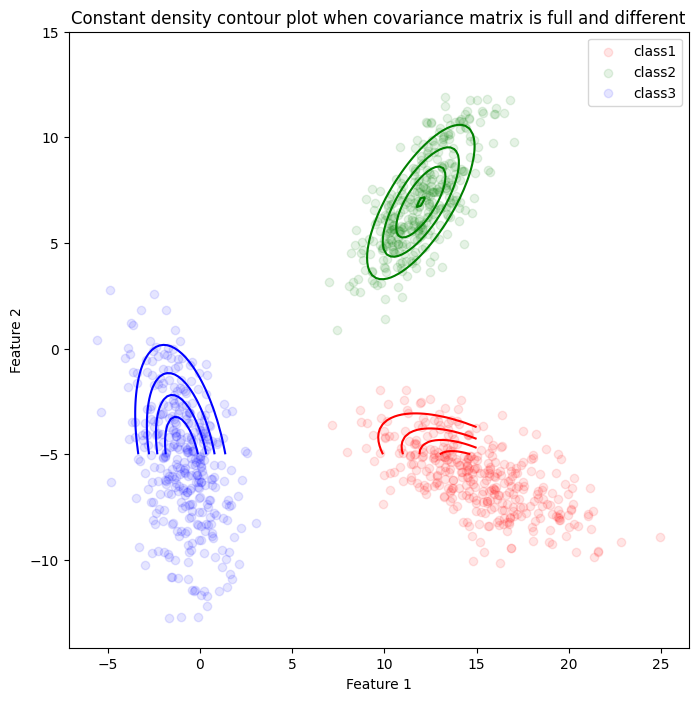

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contours(means, cov_matrix, ax, label, color):
    # Create grid and multivariate normal distribution
    x, y = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    rv = multivariate_normal([means[0], means[1]], cov_matrix)

    # Plot contour
    ax.contour(x, y, rv.pdf(pos), levels=4, colors=color)
    ax.set_title('Constant density contour plot when covariance matrix is full and different')

df_class_train = {
    'class1': df1_train,
    'class2': df2_train,
    'class3': df3_train
}

fig, ax = plt.subplots(figsize=(8, 8))

# Plot contours and training data for each class
colors = ['red', 'green', 'blue']
labels = ['class1', 'class2', 'class3']

# Superimpose the training data for each class
for i, label in enumerate(labels):
    means, cov_matrix = class_stats[label]
    plot_contours(means, cov_matrix, ax, label, colors[i])

    # Assuming df_class_train holds training data for each class
    ax.scatter(df_class_train[label][0], df_class_train[label][1], label=label, alpha=0.1, c=colors[i])

# Final plot adjustments
ax.legend()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

Covariance matrix is diagonal and different

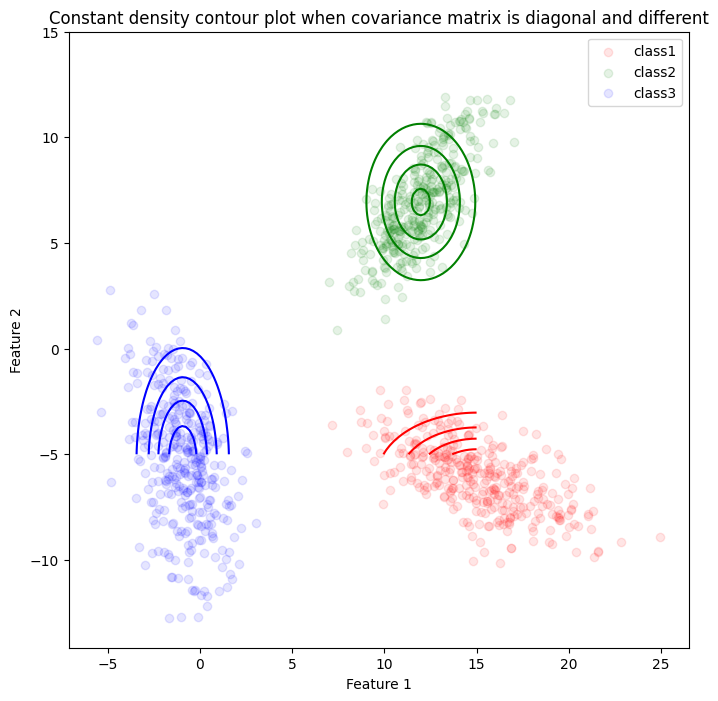

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contours(means, cov_matrix, ax, label, color):
    # Create grid and multivariate normal distribution
    x, y = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    rv = multivariate_normal([means[0], means[1]], cov_matrix)

    # Plot contour
    ax.contour(x, y, rv.pdf(pos), levels=4, colors=color)
    ax.set_title('Constant density contour plot when covariance matrix is diagonal and different')

df_class_train = {
    'class1': df1_train,
    'class2': df2_train,
    'class3': df3_train
}

fig, ax = plt.subplots(figsize=(8, 8))

# Plot contours and training data for each class
colors = ['red', 'green', 'blue']
labels = ['class1', 'class2', 'class3']

# Superimpose the training data for each class
for i, label in enumerate(labels):
    means, cov_matrix = class_stats_d[label]
    plot_contours(means, cov_matrix, ax, label, colors[i])

    # Assuming df_class_train holds training data for each class
    ax.scatter(df_class_train[label][0], df_class_train[label][1], label=label, alpha=0.1, c=colors[i])

# Final plot adjustments
ax.legend()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

Covariance matrix is full but same

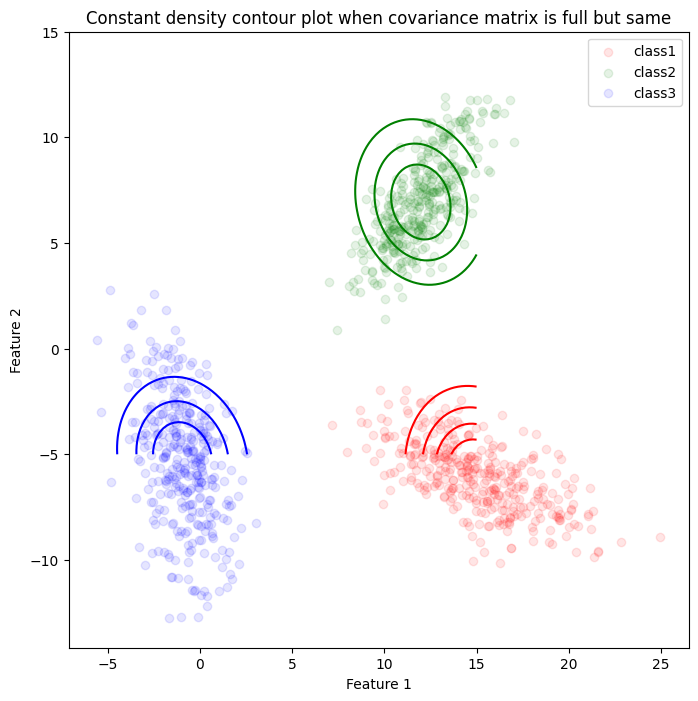

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contours(means, cov_matrix, ax, label, color):
    # Create grid and multivariate normal distribution
    x, y = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    rv = multivariate_normal([means[0], means[1]], cov_matrix)

    # Plot contour
    ax.contour(x, y, rv.pdf(pos), levels=4, colors=color)
    ax.set_title('Constant density contour plot when covariance matrix is full but same')

df_class_train = {
    'class1': df1_train,
    'class2': df2_train,
    'class3': df3_train
}

fig, ax = plt.subplots(figsize=(8, 8))

# Plot contours and training data for each class
colors = ['red', 'green', 'blue']
labels = ['class1', 'class2', 'class3']

# Superimpose the training data for each class
for i, label in enumerate(labels):
    means, cov_matrix = class_stats_all[label]
    plot_contours(means, cov_matrix, ax, label, colors[i])

    # Assuming df_class_train holds training data for each class
    ax.scatter(df_class_train[label][0], df_class_train[label][1], label=label, alpha=0.1, c=colors[i])

# Final plot adjustments
ax.legend()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

Covariance matrix is diagonal and same

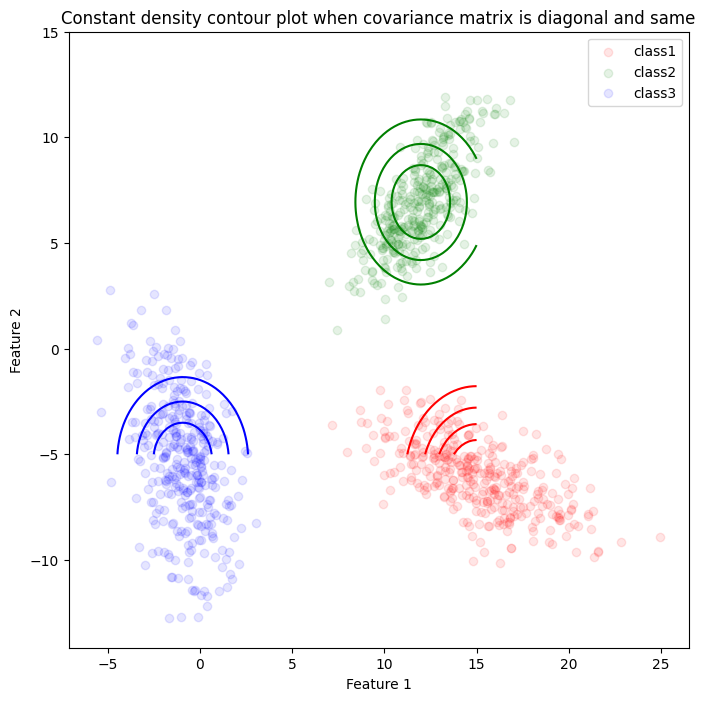

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contours(means, cov_matrix, ax, label, color):
    # Create grid and multivariate normal distribution
    x, y = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    rv = multivariate_normal([means[0], means[1]], cov_matrix)

    # Plot contour
    ax.contour(x, y, rv.pdf(pos), levels=4, colors=color)
    ax.set_title('Constant density contour plot when covariance matrix is diagonal and same')

df_class_train = {
    'class1': df1_train,
    'class2': df2_train,
    'class3': df3_train
}

fig, ax = plt.subplots(figsize=(8, 8))

# Plot contours and training data for each class
colors = ['red', 'green', 'blue']
labels = ['class1', 'class2', 'class3']

# Superimpose the training data for each class
for i, label in enumerate(labels):
    means, cov_matrix = class_stats_all_d[label]
    plot_contours(means, cov_matrix, ax, label, colors[i])

    # Assuming df_class_train holds training data for each class
    ax.scatter(df_class_train[label][0], df_class_train[label][1], label=label, alpha=0.1, c=colors[i])

# Final plot adjustments
ax.legend()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

## DECISION REGION PLOT

Covariance matrix is full and different

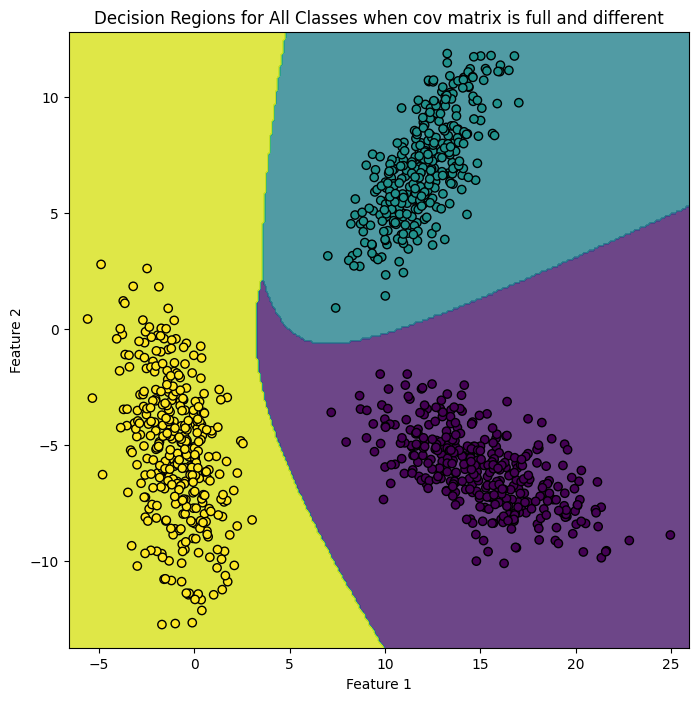

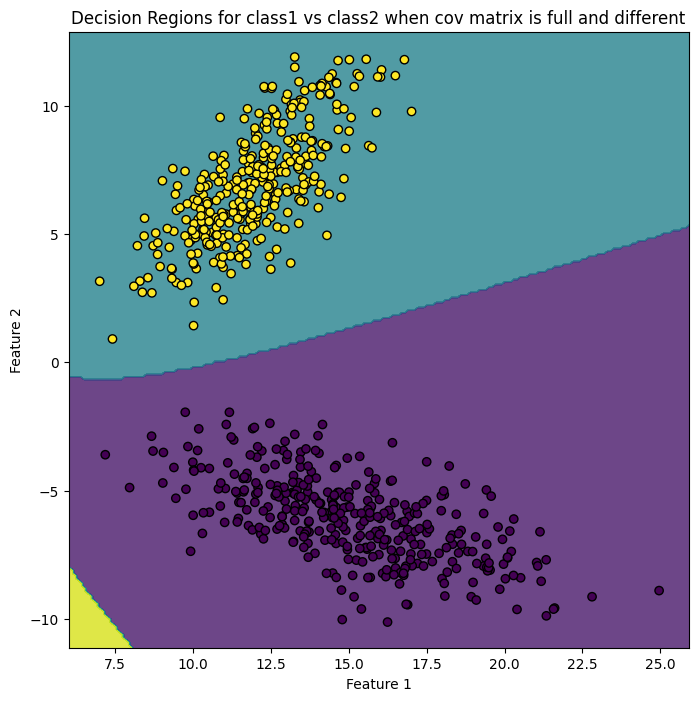

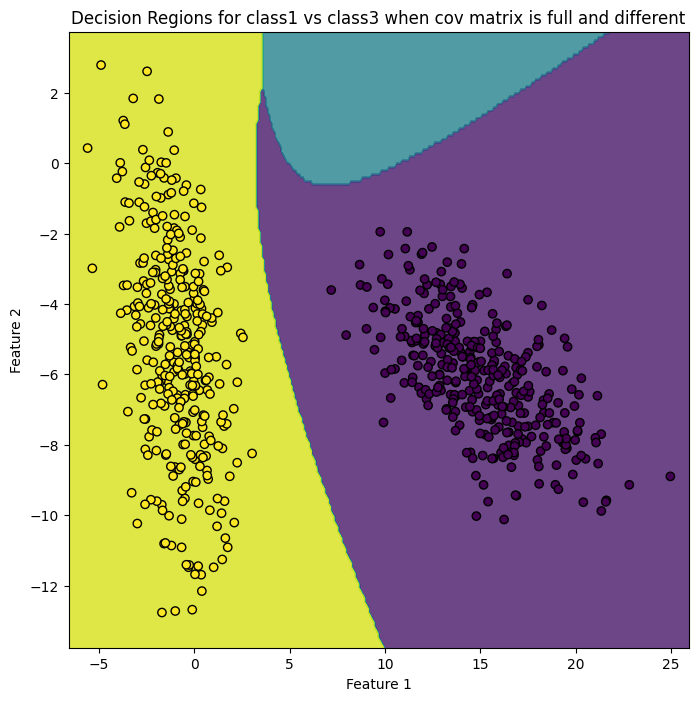

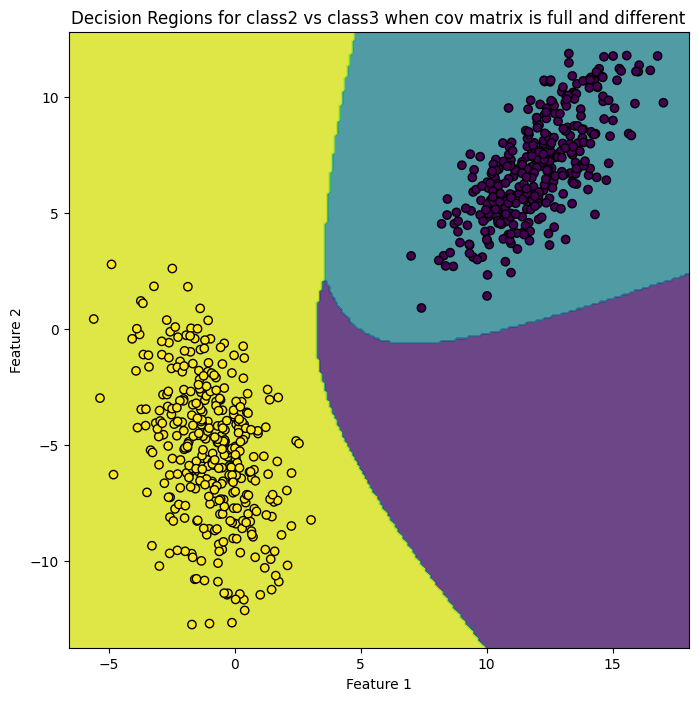

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def predict_class(x_test, class_stats, priors):
    posteriors = calculate_posterior(x_test, class_stats, priors)
    return max(posteriors, key=posteriors.get)

def create_meshgrid(df, step_size=0.1):
    x_min, x_max = df[0].min() - 1, df[0].max() + 1
    y_min, y_max = df[1].min() - 1, df[1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    return xx, yy

# Combine training data for all classes
df_train_all = pd.concat([df1_train, df2_train, df3_train], ignore_index=True)
df_train_all['class'] = ''
df_train_all.iloc[:len(df1_train), df_train_all.columns.get_loc('class')] = 'class1'
df_train_all.iloc[len(df1_train):len(df1_train)+len(df2_train), df_train_all.columns.get_loc('class')] = 'class2'
df_train_all.iloc[len(df1_train)+len(df2_train):, df_train_all.columns.get_loc('class')] = 'class3'

# Plot decision regions for all classes together
xx, yy = create_meshgrid(df_train_all)
class_mapping = {'class1': 0, 'class2': 1, 'class3': 2}
Z = np.array([predict_class([x, y], class_stats, priors) for x, y in zip(xx.ravel(), yy.ravel())])
Z = np.array([class_mapping[val] for val in Z.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df_train_all[0], df_train_all[1], c=df_train_all['class'].map({'class1': 0, 'class2': 1, 'class3': 2}), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for All Classes when cov matrix is full and different')
plt.show()

# Plot decision regions for each pair of classes
class_pairs = [('class1', 'class2'), ('class1', 'class3'), ('class2', 'class3')]
for pair in class_pairs:
    class1, class2 = pair
    df_pair = df_train_all[df_train_all['class'].isin(pair)]
    xx, yy = create_meshgrid(df_pair)
    Z = np.array([predict_class([x, y], class_stats, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = np.array([class_mapping[val] for val in Z.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(df_pair[0], df_pair[1], c=df_pair['class'].map({class1: 0, class2: 1}), edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions for {class1} vs {class2} when cov matrix is full and different')
    plt.show()

Covariance matrix is diagonal and different

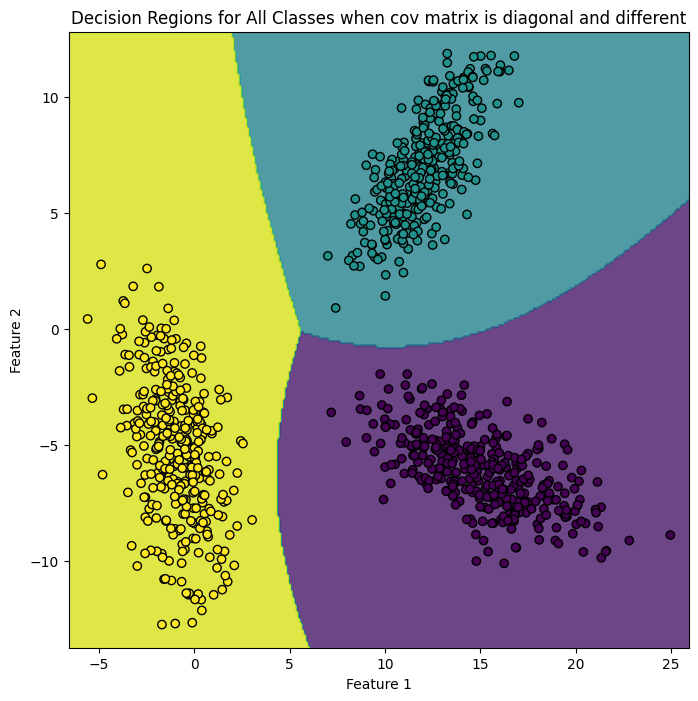

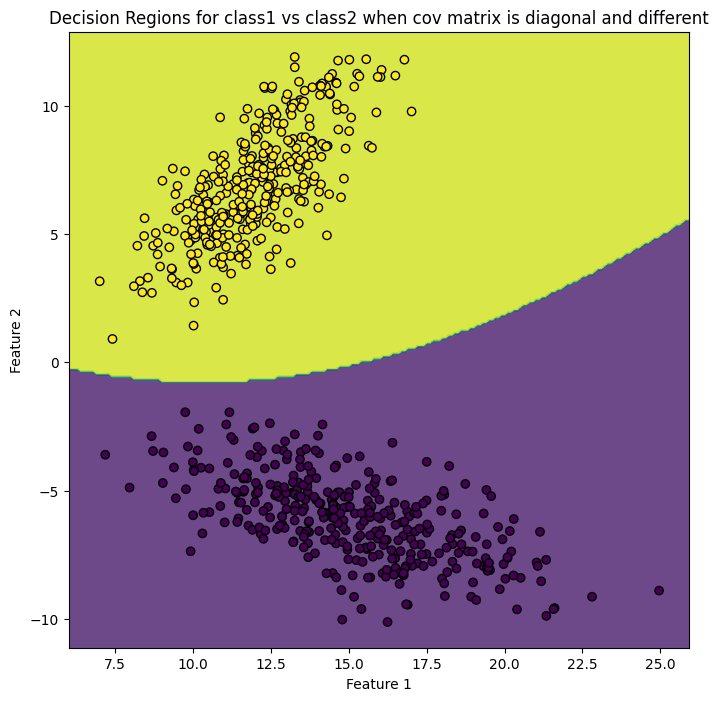

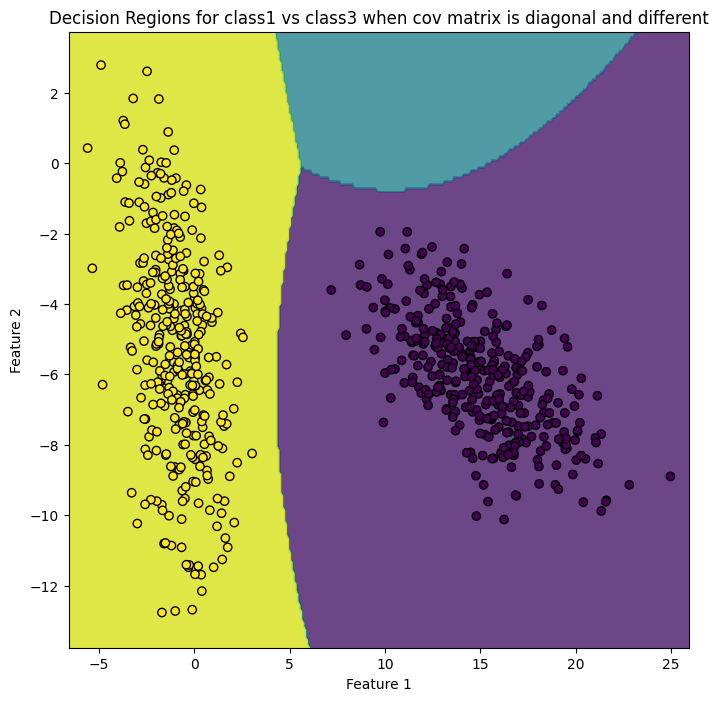

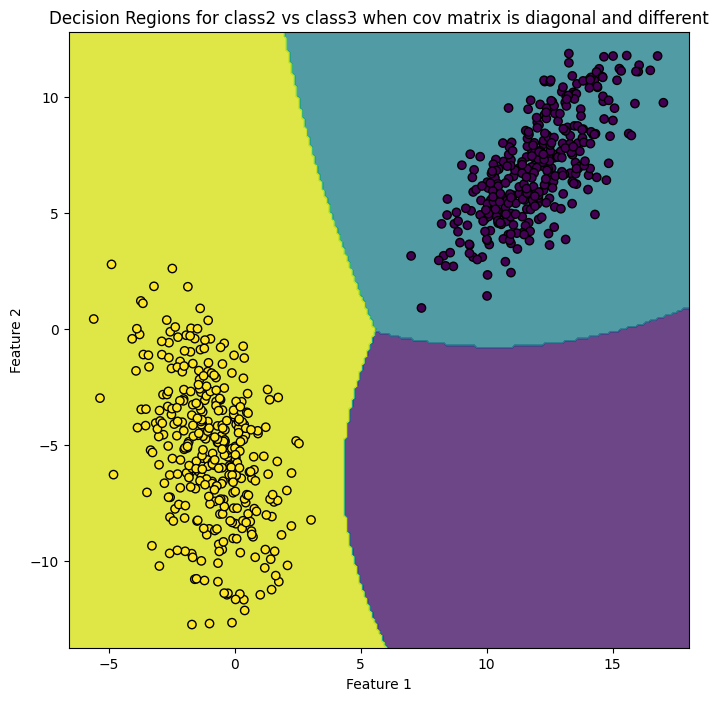

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def predict_class(x_test, class_stats, priors):
    posteriors = calculate_posterior(x_test, class_stats, priors)
    return max(posteriors, key=posteriors.get)

def create_meshgrid(df, step_size=0.1):
    x_min, x_max = df[0].min() - 1, df[0].max() + 1
    y_min, y_max = df[1].min() - 1, df[1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    return xx, yy

# Combine training data for all classes
df_train_all = pd.concat([df1_train, df2_train, df3_train], ignore_index=True)
df_train_all['class'] = ''
df_train_all.iloc[:len(df1_train), df_train_all.columns.get_loc('class')] = 'class1'
df_train_all.iloc[len(df1_train):len(df1_train)+len(df2_train), df_train_all.columns.get_loc('class')] = 'class2'
df_train_all.iloc[len(df1_train)+len(df2_train):, df_train_all.columns.get_loc('class')] = 'class3'

# Plot decision regions for all classes together
xx, yy = create_meshgrid(df_train_all)
class_mapping = {'class1': 0, 'class2': 1, 'class3': 2}
Z = np.array([predict_class([x, y], class_stats_d, priors) for x, y in zip(xx.ravel(), yy.ravel())])
Z = np.array([class_mapping[val] for val in Z.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df_train_all[0], df_train_all[1], c=df_train_all['class'].map({'class1': 0, 'class2': 1, 'class3': 2}), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for All Classes when cov matrix is diagonal and different')
plt.show()

# Plot decision regions for each pair of classes
class_pairs = [('class1', 'class2'), ('class1', 'class3'), ('class2', 'class3')]
for pair in class_pairs:
    class1, class2 = pair
    df_pair = df_train_all[df_train_all['class'].isin(pair)]
    xx, yy = create_meshgrid(df_pair)
    Z = np.array([predict_class([x, y], class_stats_d, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = np.array([class_mapping[val] for val in Z.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(df_pair[0], df_pair[1], c=df_pair['class'].map({class1: 0, class2: 1}), edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions for {class1} vs {class2} when cov matrix is diagonal and different')
    plt.show()

Covariance matrix is full but same

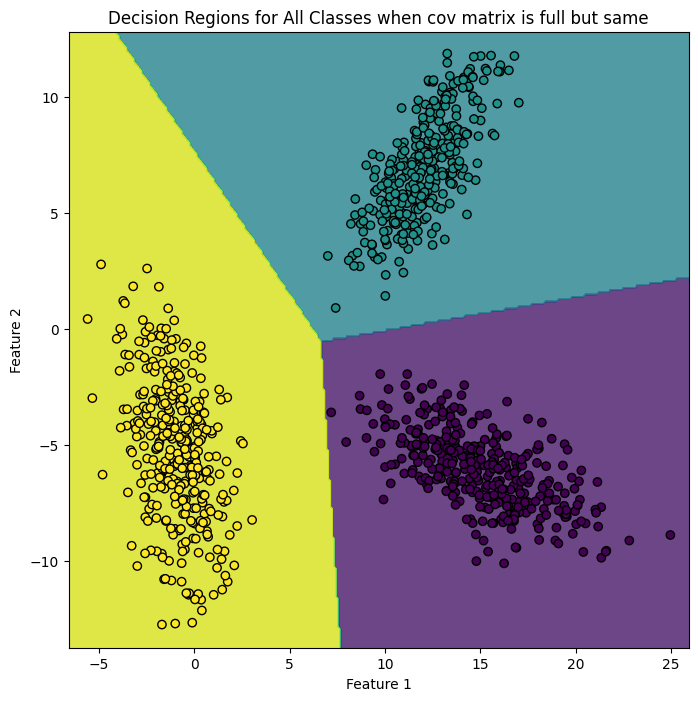

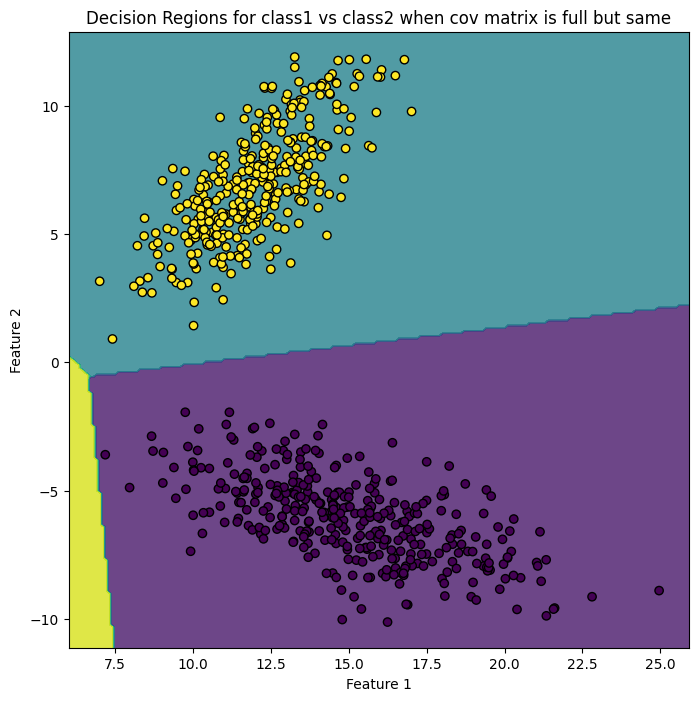

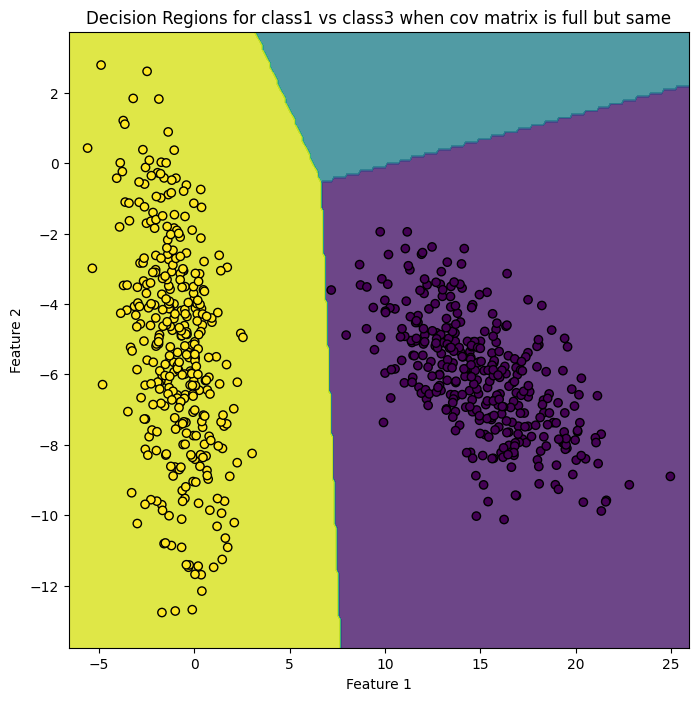

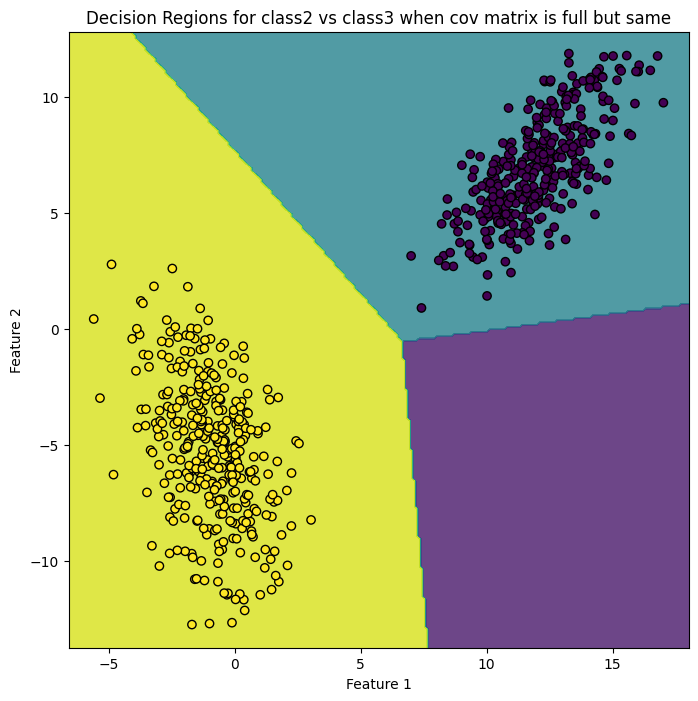

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def predict_class(x_test, class_stats, priors):
    posteriors = calculate_posterior(x_test, class_stats, priors)
    return max(posteriors, key=posteriors.get)

def create_meshgrid(df, step_size=0.1):
    x_min, x_max = df[0].min() - 1, df[0].max() + 1
    y_min, y_max = df[1].min() - 1, df[1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    return xx, yy

# Combine training data for all classes
df_train_all = pd.concat([df1_train, df2_train, df3_train], ignore_index=True)
df_train_all['class'] = ''
df_train_all.iloc[:len(df1_train), df_train_all.columns.get_loc('class')] = 'class1'
df_train_all.iloc[len(df1_train):len(df1_train)+len(df2_train), df_train_all.columns.get_loc('class')] = 'class2'
df_train_all.iloc[len(df1_train)+len(df2_train):, df_train_all.columns.get_loc('class')] = 'class3'

# Plot decision regions for all classes together
xx, yy = create_meshgrid(df_train_all)
class_mapping = {'class1': 0, 'class2': 1, 'class3': 2}
Z = np.array([predict_class([x, y], class_stats_all, priors) for x, y in zip(xx.ravel(), yy.ravel())])
Z = np.array([class_mapping[val] for val in Z.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df_train_all[0], df_train_all[1], c=df_train_all['class'].map({'class1': 0, 'class2': 1, 'class3': 2}), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for All Classes when cov matrix is full but same')
plt.show()

# Plot decision regions for each pair of classes
class_pairs = [('class1', 'class2'), ('class1', 'class3'), ('class2', 'class3')]
for pair in class_pairs:
    class1, class2 = pair
    df_pair = df_train_all[df_train_all['class'].isin(pair)]
    xx, yy = create_meshgrid(df_pair)
    Z = np.array([predict_class([x, y], class_stats_all, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = np.array([class_mapping[val] for val in Z.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(df_pair[0], df_pair[1], c=df_pair['class'].map({class1: 0, class2: 1}), edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions for {class1} vs {class2} when cov matrix is full but same')
    plt.show()

Covariance matrix is diagonal and same

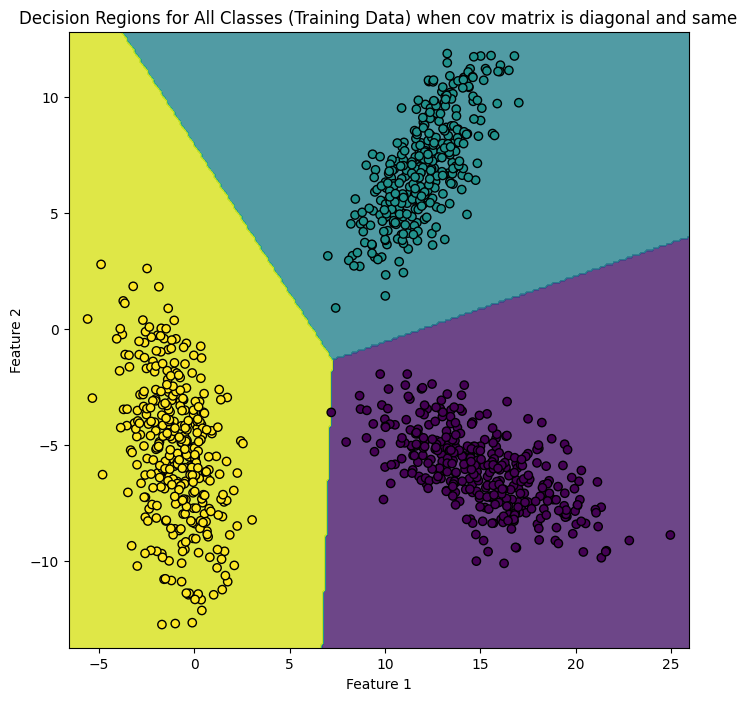

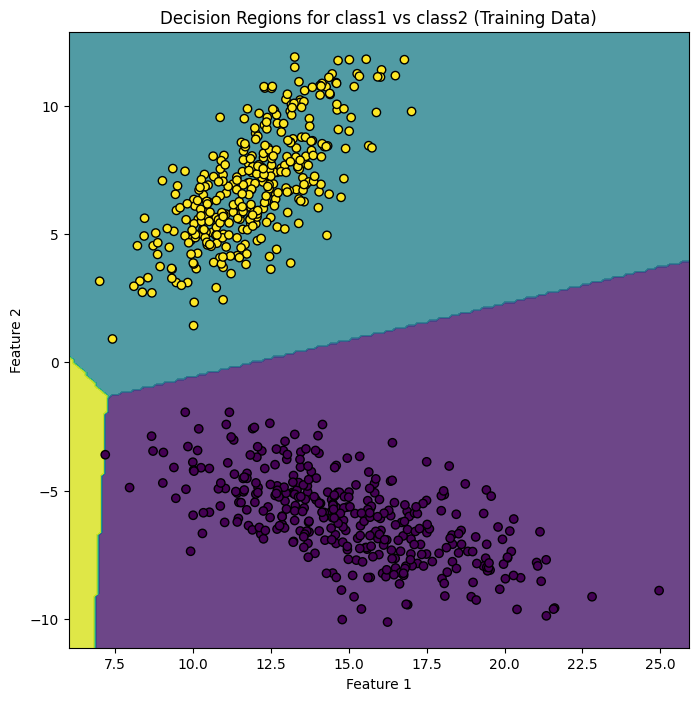

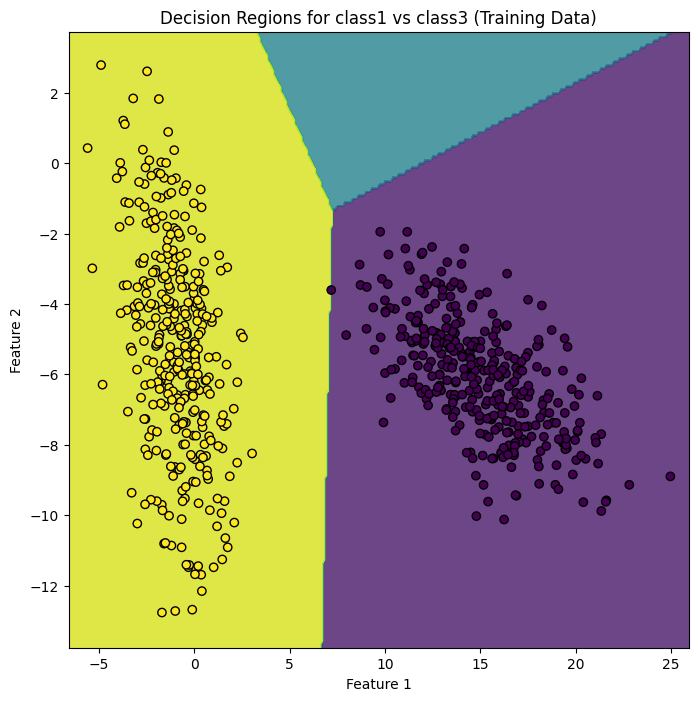

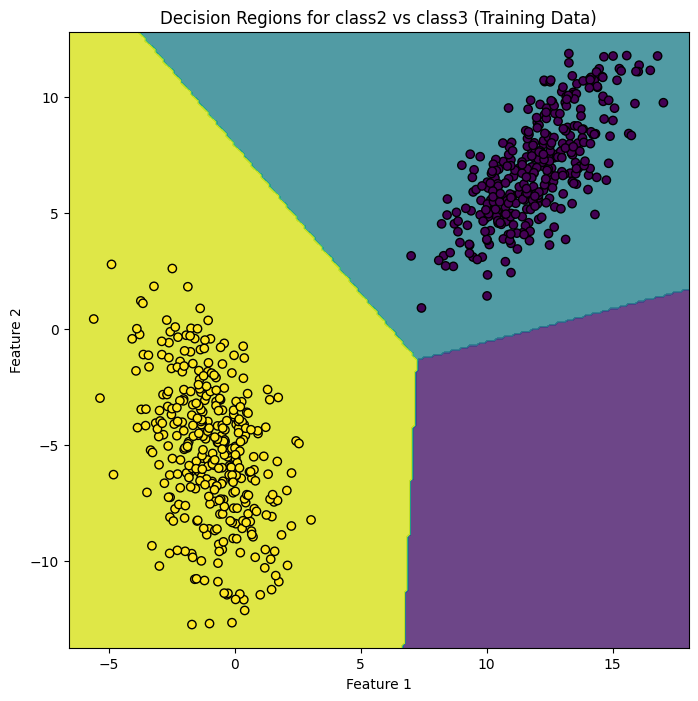

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def predict_class(x_test, class_stats, priors):
    posteriors = calculate_posterior(x_test, class_stats, priors)
    return max(posteriors, key=posteriors.get)

def create_meshgrid(df, step_size=0.1):
    x_min, x_max = df[0].min() - 1, df[0].max() + 1
    y_min, y_max = df[1].min() - 1, df[1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    return xx, yy

# Combine training data for all classes
df_train_all = pd.concat([df1_train, df2_train, df3_train], ignore_index=True)
df_train_all['class'] = ''
df_train_all.iloc[:len(df1_train), df_train_all.columns.get_loc('class')] = 'class1'
df_train_all.iloc[len(df1_train):len(df1_train)+len(df2_train), df_train_all.columns.get_loc('class')] = 'class2'
df_train_all.iloc[len(df1_train)+len(df2_train):, df_train_all.columns.get_loc('class')] = 'class3'

# Plot decision regions for all classes together
xx, yy = create_meshgrid(df_train_all)
class_mapping = {'class1': 0, 'class2': 1, 'class3': 2}
Z = np.array([predict_class([x, y], class_stats_all_d, priors) for x, y in zip(xx.ravel(), yy.ravel())])
Z = np.array([class_mapping[val] for val in Z.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df_train_all[0], df_train_all[1], c=df_train_all['class'].map({'class1': 0, 'class2': 1, 'class3': 2}), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for All Classes (Training Data) when cov matrix is diagonal and same')
plt.show()

# Plot decision regions for each pair of classes
class_pairs = [('class1', 'class2'), ('class1', 'class3'), ('class2', 'class3')]
for pair in class_pairs:
    class1, class2 = pair
    df_pair = df_train_all[df_train_all['class'].isin(pair)]
    xx, yy = create_meshgrid(df_pair)
    Z = np.array([predict_class([x, y], class_stats_all_d, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = np.array([class_mapping[val] for val in Z.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(df_pair[0], df_pair[1], c=df_pair['class'].map({class1: 0, class2: 1}), edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions for {class1} vs {class2} (Training Data)')
    plt.show()